<a href="https://colab.research.google.com/github/Gabbovnzla/Coding_Dojo/blob/main/Sabado_Deserci%C3%B3n_laboral_(Exam).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
from google.colab import drive

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [99]:
desercion_laboral = ("/content/drive/MyDrive/BOOTCAMP_CODING_DOJO(DATA_SCIENCE)/Mod_employee_attrition.xlsx")
df = pd.read_excel(desercion_laboral)

In [100]:
df.shape #mostrar dimenciones (filas, columnas)

(1475, 35)

In [101]:
df.shape[0] # cantidad de filas

1475

In [102]:
df.shape[1] # cantidad de columnas

35

In [103]:
df.head() # mostrando cabecera

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,7,1,...,4,80,1,6,3,3,2,2,2,2


In [104]:
df.info() # mostrando informacion detallada

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1475 non-null   int64 
 1   Attrition                 1475 non-null   object
 2   BusinessTravel            1475 non-null   object
 3   Department                1475 non-null   object
 4   DistanceFromHome          1475 non-null   int64 
 5   Education                 1475 non-null   int64 
 6   EducationField            1475 non-null   object
 7   EmployeeCount             1475 non-null   int64 
 8   EmployeeNumber            1475 non-null   int64 
 9   EnvironmentSatisfaction   1475 non-null   int64 
 10  Gender                    590 non-null    object
 11  HourlyRate                1475 non-null   object
 12  JobInvolvement            1475 non-null   int64 
 13  JobLevel                  1475 non-null   int64 
 14  JobRole                 

##1. Ahora, damos un analisis de la base de datos

1.A) Identificar y abordar cualquier valor duplicado

In [105]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1470    False
1471    False
1472    False
1473    False
1474    False
Length: 1475, dtype: bool

In [106]:
duplicados = df[df.duplicated()]  # mostrandolos valores duplicados
print("Valores duplicados:")
print(duplicados)

Valores duplicados:
      Age Attrition BusinessTravel              Department  DistanceFromHome  \
14     34        No  Travel_Rarely  Research & Development                19   
159    58        No  Travel_Rarely  Research & Development                 9   
625    32        No  Travel_Rarely                   Sales                13   
815    38        No  Travel_Rarely                   Sales                 2   
1145   44        No  Travel_Rarely  Research & Development                 7   

      Education EducationField  EmployeeCount  EmployeeNumber  \
14            2        Medical              1              18   
159           3        Medical              1             214   
625           4  Life Sciences              1             859   
815           2      Marketing              1            1125   
1145          3        Medical              1            1608   

      EnvironmentSatisfaction  ... RelationshipSatisfaction StandardHours  \
14                          2  

In [107]:
df_sin_duplicados = df.drop_duplicates()  # eliminando los valores duplicados y mostrandolos valores sin duplicados
print("Información sobre el DataFrame sin duplicados:")
print(df_sin_duplicados.info())

Información sobre el DataFrame sin duplicados:
<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 0 to 1474
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeCount             1470 non-null   int64 
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    588 non-null    object
 11  HourlyRate                1470 non-null   object
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-n

1.B) Identifique y aborde los valores faltantes en este conjunto de datos. Trate estos adecuadamente. Incluya una breve descripción del método que utilizó para tratar los valores faltantes junto con una justificación para ese método.

In [108]:
valores_faltantes = df.isnull().sum() #Ientificamos con una dataframe los valores faltantes

In [109]:
print("Valores faltantes por columna:")  #se muestran valores faltantes
print(valores_faltantes)

Valores faltantes por columna:
Age                           0
Attrition                     0
BusinessTravel                0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                      885
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
DailyRate                     0
WeeklyRate                    0
YearlyRate                    0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeB

Ahora se han identificado en la columna del "GENDER" un valor de 885 valores por faltar

Ahora tenemos que tratar los valores faltantes. En mi caso utilizare el metodo dropna

In [110]:
df.isna().head() #antes mostramos valores true o false

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [111]:
df.isnull().sum().sum()   #mostrando el total de datos faltanes en la fila del genero

885

In [112]:
df.isnull().any() #aplicamos la funcion "any"  #YouTube = Google colab y ejemplo con dataset con Python - Fuente: JOSE OJEDA ROJAS

Age                         False
Attrition                   False
BusinessTravel              False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                       True
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
DailyRate                   False
WeeklyRate                  False
YearlyRate                  False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [113]:
df_sin_faltantes = df.dropna(how="any") #eliminamos las filas con valores faltantes

In [114]:
df_sin_faltantes.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
DailyRate                   0
WeeklyRate                  0
YearlyRate                  0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Ahora mostramos la anterior con shape y la actual con shape, donde se observaran los valores nulos y sin nulos

In [115]:
df.shape

(1475, 35)

In [116]:
df_sin_faltantes.shape

(590, 35)

1.C) Asegúrese de que todas las columnas coincidan con los tipos de datos enumerados en el diccionario de datos.

In [117]:
tipos_de_datos_actuales = df.dtypes #verificando los tipos de datos que existen en el data
print("Tipos de datos actuales:")
print(tipos_de_datos_actuales)

Tipos de datos actuales:
Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                  object
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
DailyRate                    int64
WeeklyRate                   int64
YearlyRate                   int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             i

In [118]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                  object
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
DailyRate                    int64
WeeklyRate                   int64
YearlyRate                   int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1475 non-null   int64 
 1   Attrition                 1475 non-null   object
 2   BusinessTravel            1475 non-null   object
 3   Department                1475 non-null   object
 4   DistanceFromHome          1475 non-null   int64 
 5   Education                 1475 non-null   int64 
 6   EducationField            1475 non-null   object
 7   EmployeeCount             1475 non-null   int64 
 8   EmployeeNumber            1475 non-null   int64 
 9   EnvironmentSatisfaction   1475 non-null   int64 
 10  Gender                    590 non-null    object
 11  HourlyRate                1475 non-null   object
 12  JobInvolvement            1475 non-null   int64 
 13  JobLevel                  1475 non-null   int64 
 14  JobRole                 

1.D) Identificar y abordar cualquier inconsistencia en los valores categóricos (ejemplo: gato, Gato, gatos)

1.E) Identifique y aborde cualquier punto de datos inapropiado o inusual (ejemplo: la edad no puede ser 325)

Primero veremos que contiene cada columna dentro de ella. Aplicando unique()

In [121]:
df.Age.unique()

array([ 41,  49,  37,  33,  27,  32,  59,  30,  38,  36,  35,  29,  31,
        34,  28,  22,  53,  24,  21,  42,  44,  46,  39,  43,  50,  26,
        48,  55,  45,  56,  23,  51,  40,  54, 578,  20,  25,  58,  19,
        57,  52,  47,  18,  60])

In [164]:
puntos_inapropiados = df[df['Age'] >90]  #aplicaos filtros de la edad no mayor a noventa años de edad
print("Puntos de datos inapropiados:")
print(puntos_inapropiados)

Puntos de datos inapropiados:
    Age Attrition BusinessTravel Department  DistanceFromHome  Education  \
99  578        No  Travel_Rarely      Sales                10          4   

   EducationField  EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  \
99        Medical              1             131                        4   

    ... RelationshipSatisfaction StandardHours  StockOptionLevel  \
99  ...                        3            80                 0   

    TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance YearsAtCompany  \
99                 38                     1                2             37   

    YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
99                  10                        1                     8  

[1 rows x 35 columns]


In [122]:
df.Attrition.unique()

array(['Yes', 'No'], dtype=object)

In [152]:
df.Department.unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [153]:
df.DistanceFromHome.unique()

array([ 1,  8,  2,  3, 24, 23, 27, 16, 15, 26, 19, 21,  5, 11,  9,  7,  6,
       10,  4, 25, 12, 18, 29, 22, 14, 20, 28, 17, 13])

In [125]:
df.Education.unique()

array([2, 1, 4, 3, 5])

In [154]:
df.EducationField.unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [127]:
df.EmployeeCount.unique()

array([1])

In [128]:
df.EmployeeNumber.unique()

array([   1,    2,    4, ..., 2064, 2065, 2068])

In [129]:
df.EnvironmentSatisfaction.unique()

array([2, 3, 4, 1])

In [130]:
df.Gender.unique()

array(['Female', nan], dtype=object)

In [170]:
df.HourlyRate.unique()

array([94, 61, 92, 56, 40, 79, 81, 67, 44, '94_', 84, 49, 31, 93, 50, 51,
       80, 96, 78, 45, 82, 53, 83, 58, 72, 48, 42, 41, 86, 97, 75, 33, 37,
       73, 98, 36, 47, 71, 30, 43, 99, 59, 95, 57, 76, 87, 66, 55, 32, 52,
       70, 62, 64, 63, 60, 100, 46, 39, 77, 35, 91, 54, 34, 90, 65, 88,
       85, 89, 68, 69, 74, 38], dtype=object)

In [132]:
df.JobInvolvement.unique()

array([3, 2, 4, 1])

In [133]:
df.JobLevel.unique()

array([2, 1, 3, 4, 5])

In [134]:
df.JobRole.unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [135]:
df.JobSatisfaction.unique()

array([4, 2, 3, 1])

In [136]:
df.MaritalStatus.unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [137]:
df.DailyRate.unique()

array([752, 488, 736, 448, 320, 632, 648, 536, 352, 672, 392, 248, 744,
       400, 408, 640, 768, 624, 360, 656, 424, 664, 464, 576, 384, 336,
       328, 688, 776, 600, 264, 296, 584, 784, 288, 376, 568, 240, 344,
       792, 472, 760, 456, 608, 696, 528, 440, 256, 416, 560, 496, 512,
       504, 480, 800, 368, 312, 616, 280, 728, 432, 272, 720, 520, 704,
       680, 712, 544, 552, 592, 304])

In [138]:
df.WeeklyRate.unique()

array([3760, 2440, 3680, 2240, 1600, 3160, 3240, 2680, 1760, 3360, 1960,
       1240, 3720, 2000, 2040, 3200, 3840, 3120, 1800, 3280, 2120, 3320,
       2320, 2880, 1920, 1680, 1640, 3440, 3880, 3000, 1320, 1480, 2920,
       3920, 1440, 1880, 2840, 1200, 1720, 3960, 2360, 3800, 2280, 3040,
       3480, 2640, 2200, 1280, 2080, 2800, 2480, 2560, 2520, 2400, 4000,
       1840, 1560, 3080, 1400, 3640, 2160, 1360, 3600, 2600, 3520, 3400,
       3560, 2720, 2760, 2960, 1520])

In [139]:
df.YearlyRate.unique()

array([195520, 126880, 191360, 116480,  83200, 164320, 168480, 139360,
        91520, 174720, 101920,  64480, 193440, 104000, 106080, 166400,
       199680, 162240,  93600, 170560, 110240, 172640, 120640, 149760,
        99840,  87360,  85280, 178880, 201760, 156000,  68640,  76960,
       151840, 203840,  74880,  97760, 147680,  62400,  89440, 205920,
       122720, 197600, 118560, 158080, 180960, 137280, 114400,  66560,
       108160, 145600, 128960, 133120, 131040, 124800, 208000,  95680,
        81120, 160160,  72800, 189280, 112320,  70720, 187200, 135200,
       183040, 176800, 185120, 141440, 143520, 153920,  79040])

In [140]:
df.NumCompaniesWorked.unique()

array([8, 1, 6, 9, 0, 4, 5, 2, 7, 3])

In [141]:
df.Over18.unique()

array(['Y'], dtype=object)

In [142]:
df.OverTime.unique()

array(['Yes', 'No'], dtype=object)

In [143]:
df.PercentSalaryHike.unique()

array([11, 23, 15, 12, 13, 20, 22, 21, 17, 14, 16, 18, 19, 24, 25])

In [144]:
df.PerformanceRating.unique()

array([3, 4])

In [145]:
df.RelationshipSatisfaction.unique()

array([1, 4, 2, 3])

In [146]:
df.StandardHours.unique()

array([80])

In [147]:
df.StockOptionLevel.unique()

array([0, 1, 3, 2])

In [148]:
df.TotalWorkingYears.unique()

array([ 8, 10,  7,  6, 12,  1, 17,  5,  3, 31, 13,  0, 26, 24, 22,  9, 19,
        2, 23, 14, 15,  4, 29, 28, 21, 25, 20, 11, 16, 37, 38, 30, 40, 18,
       36, 34, 32, 33, 35, 27])

In [149]:
df.TrainingTimesLastYear.unique()

array([0, 3, 2, 5, 1, 4, 6])

In [150]:
df.WorkLifeBalance.unique()

array([1, 3, 2, 4])

In [151]:
df.YearsAtCompany.unique()

array([6, 10, 0, 8, 2, 7, 1, 9, 5, 4, 25, 3, 12, 14, 22, '5!', 15, 27, 21,
       17, 11, 13, 37, 16, 20, 40, 24, 33, 19, 36, 18, 29, 31, 32, 34, 26,
       30, 23], dtype=object)

In [172]:
df_sin_inapropiados = df[df['Age'] <= 90]

In [173]:
df['Age'] = df['Age'].apply(lambda x: x if x <= 120 else None)

Ahora, vamos a reemplazar y mostrar información sobre el df después de tratar los puntos de datos inapropiados

In [174]:
print("Información sobre el DataFrame después de tratar los puntos de datos inapropiados:")
print(df_sin_inapropiados.info())

Información sobre el DataFrame después de tratar los puntos de datos inapropiados:
<class 'pandas.core.frame.DataFrame'>
Index: 1474 entries, 0 to 1474
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1474 non-null   int64 
 1   Attrition                 1474 non-null   object
 2   BusinessTravel            1474 non-null   object
 3   Department                1474 non-null   object
 4   DistanceFromHome          1474 non-null   int64 
 5   Education                 1474 non-null   int64 
 6   EducationField            1474 non-null   object
 7   EmployeeCount             1474 non-null   int64 
 8   EmployeeNumber            1474 non-null   int64 
 9   EnvironmentSatisfaction   1474 non-null   int64 
 10  Gender                    590 non-null    object
 11  HourlyRate                1474 non-null   object
 12  JobInvolvement            1474 non-null   int64 
 13  

##2- El siguiente paso es completar una exploración basada en los datos usando Python. Esto debería incluir:

2.A- 1) Dos tipos diferentes de visualizaciones exploratorias univariadas.

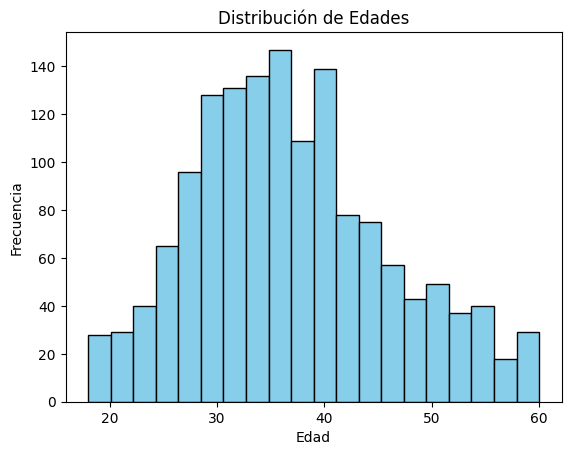

In [179]:
#import matplotlib.pyplot as plt
#import pandas as pd

# Cargar los datos (reemplazar el archivo pandas con la ruta de tu archivo)

# Visualización del histograma de una variable (por ejemplo, la Age)
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

2.A -2) Cada visualización debe incluir una breve interpretación dentro del archivo de código.

2.B -1) Dos tipos diferentes de visualizaciones exploratorias multivariadas.

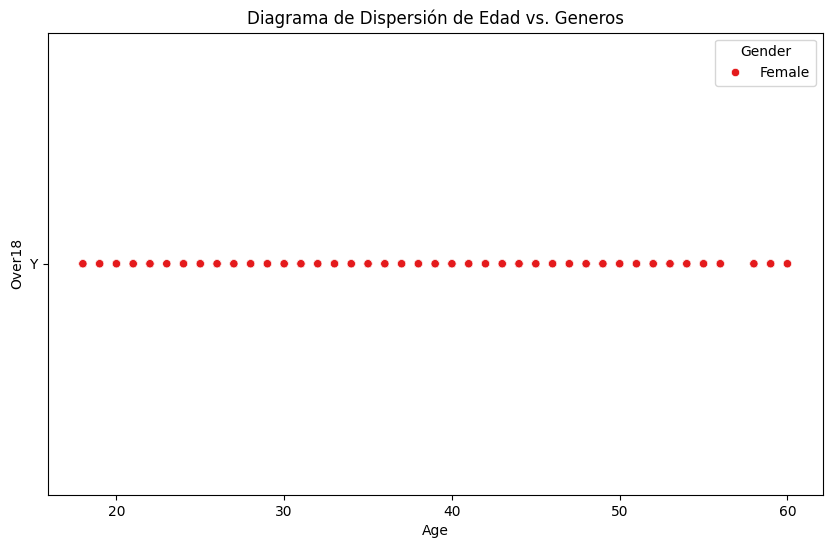

In [178]:
import matplotlib.pyplot as plt  #en esta parte me ayude con La herramienta ChatGpt "No supe como conectar la libreria seaborn"
import seaborn as sns
import pandas as pd


# Visualización del diagrama de dispersión con codificación de colores (por ejemplo, edad vs. ingresos)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Over18', hue='Gender', data=df, palette='Set1')
plt.title('Diagrama de Dispersión de Edad vs. Generos')
plt.xlabel('Age')
plt.ylabel('Over18')
plt.legend(title='Gender')
plt.show()

2.B -2) Cada visualización debe incluir una breve interpretación dentro del archivo de código